In [1]:
import os
import numpy as np
import subprocess
import glob
import os
import shutil
import nglview

import pymatgen as pmg
from pymatgen.io.vasp.outputs import Vasprun
import phonopy
from phonopy import Phonopy
from phonopy.structure.atoms import Atoms as PhonopyAtoms
from ase.io import read, write
from ase.visualize import view
from phonopy.phonon.band_structure import get_band_qpoints_and_path_connections

 # Setup plotting, seaborn is just used to make figures look a bit nicer not required
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
prim = read('POSCAR')
view(prim, viewer='ngl')

In [6]:
# Generate the displaced supercells
subprocess.call('phonopy -d --dim=\"5 5 1\"', shell=True)
#os.makedirs('poscars')
subprocess.call('mv POSCAR-* poscars', shell=True)

        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.17.2

Python version 3.8.0
Spglib version 2.0.2

Crystal structure was read from "POSCAR".
Unit of length: angstrom
Displacements creation mode
Settings:
  Supercell: [5 5 1]
Spacegroup: P-6m2 (187)
Use -v option to watch primitive cell, unit cell, and supercell structures.

"phonopy_disp.yaml" and supercells have been created.

Summary of calculation was written in "phonopy_disp.yaml".
                 _
   ___ _ __   __| |
  / _ \ '_ \ / _` |
 |  __/ | | | (_| |
  \___|_| |_|\__,_|



0

In [11]:
subprocess.call('phonopy -f 001/vasprun.xml 002/vasprun.xml 003/vasprun.xml', shell=True)
subprocess.call('phonopy --writefc --hdf5 --full-fc  --dim="5 5 1"', shell=True)

        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.17.2

Python version 3.8.0
Spglib version 2.0.2

Displacements were read from "phonopy_disp.yaml".
counter (file index): 1 2 3 
"FORCE_SETS" has been created.
                 _
   ___ _ __   __| |
  / _ \ '_ \ / _` |
 |  __/ | | | (_| |
  \___|_| |_|\__,_|

        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.17.2

Python version 3.8.0
Spglib version 2.0.2

Crystal structure was read from "POSCAR".
Unit of length: angstrom
Settings:
  Supercell: [5 5 1]
Spacegroup: P-6m2 (187)
Use -v option 

0

Supercell structure was read from "SPOSCAR".
Force constants format was transformed to compact format.
Force constants were read from "force_constants.hdf5".


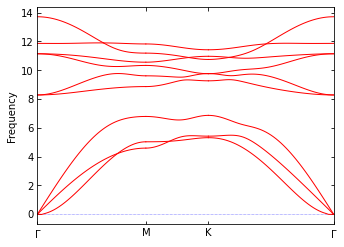

In [12]:
import phonopy
from phonopy.phonon.band_structure import get_band_qpoints_and_path_connections
phonon = phonopy.load(supercell_filename="SPOSCAR", log_level=1)
path = [[[0, 0, 0], [1/2, 0, 0], [1/3, 1/3, 0.0], [0,0,0]]]
labels = ["$\\Gamma$", "M","K", "$\\Gamma$"]
qpoints, connections = get_band_qpoints_and_path_connections(path, npoints=51)
phonon.run_band_structure(qpoints, path_connections=connections, labels=labels)
phonon.plot_band_structure().show()

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from ase.io import read, write
from phonopy import Phonopy
from phonopy.structure.atoms import PhonopyAtoms

from hiphive import ForceConstants, ClusterSpace, ForceConstantPotential
from hiphive import enforce_rotational_sum_rules
from hiphive.utilities import extract_parameters


from hiphive import ForceConstants
from hiphive.utilities import extract_parameters
from hiphive import enforce_rotational_sum_rules
from trainstation import Optimizer

In [14]:
# read atoms and force constants
# Use calculated phonopy IFCS to and pare them as hiphive FCP
prim = read('POSCAR')
supercell = read('SPOSCAR')
fcs_phonopy = ForceConstants.read_phonopy(supercell, 'force_constants.hdf5')
cutoff = 7.8

In [15]:
# Use calculated phonopy IFCS to and pare them as 
cs = ClusterSpace(prim, [cutoff])
parameters = extract_parameters(fcs_phonopy, cs)
enforced_parameters = enforce_rotational_sum_rules(cs, parameters, ['Huang', 'Born-Huang'])
fcp_rot = ForceConstantPotential(cs, enforced_parameters)
fcs_hiphive_rot = fcp_rot.get_force_constants(supercell)

Primitive cell:
    Formula: MoS2
    Cell:
        [  3.18999   0.00000   0.00000]
        [ -1.59500   2.76261   0.00000]
        [  0.00000   0.00000  21.14717]
    Basis:
        Mo  [  0.00000   0.00000   0.50000]
        S   [  0.66667   0.33333   0.42622]
        S   [  0.66667   0.33333   0.57378]

Crystal symmetry:
    Spacegroup:          P-6m2 (187)
    Unique site:         2
    Symmetry operations: 12
    symprec:             1.00e-05

Cutoffs:
    Maximum cutoff: 7.8
    Found 3 center atoms with 66 images totaling 69 atoms

Clusters:
    Clusters: {2: 176}
    Total number of clusters: 176

Orbits:
    Orbits: {2: 17}
    Total number of orbits: 17

Eigentensors:
    Eigentensors: {2: 84}
    Total number of parameters: 84

Constraints:
    Acoustic: True
    Number of degrees of freedom: {2: 80}
    Total number of degrees of freedom: 80
Force constant reconstruction error order 2:    0.2369%
Rotational sum-rules before, ||Ax|| =    6.628932266179758
Rotational sum-rule

In [27]:
# This generates the q mesh needed for calculations of phonon dispersion.

THz_to_meV = 4.13567

def get_band(q_start, q_stop, N):
    """ Return path between q_start and q_stop """
    return np.array([q_start + (q_stop-q_start)*i/(N-1) for i in range(N)])

def plot_dispersion(fcs, color, label):
    # set force constants
    phonon.set_force_constants(fcs.get_fc_array(order=2))

    # get dispersion
    phonon.set_band_structure(bands)
    _, qnorms, freqs, _ = phonon.get_band_structure()
    qnorms = np.hstack(qnorms)
    freqs = THz_to_meV * np.vstack(freqs)
    lines = ax1.plot(qnorms, freqs, color=color)
    lines[0].set_label(label)

# define band path
N_band_pts = 500
G2M = get_band(np.array([0.0, 0.0, 0.0]), np.array([1/2, 0, 0.0]), N_band_pts)
M2K = get_band(np.array([1/2, 0.0, 0.0]), np.array([1/3, 1/3, 0.0]), N_band_pts)
K2G= get_band(np.array([1/3, 1/3, 0.0]), np.array([0, 0, 0.0]), N_band_pts)
bands = [G2M]

Max drift of force constants: -0.003466 (zz) 0.000005 (xx)
Max drift of force constants: -0.000000 (xx) -0.000000 (xx)


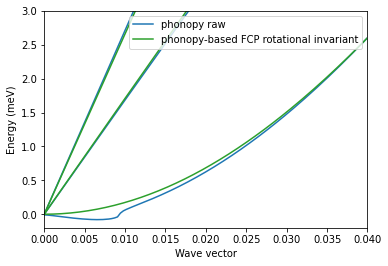

In [28]:
# plotting
fig = plt.figure(figsize=(5.5, 3.8))
ax1 = fig.add_subplot(111)

#ax1.axhline(y=0.0, ls='-', c='k', lw=1.0)
plot_dispersion(fcs_phonopy, 'tab:blue', 'phonopy raw')
plot_dispersion(fcs_hiphive_rot, 'tab:green', 'phonopy-based FCP rotational invariant')

# show
ax1.legend(loc=1)
ax1.set_xlim(0, 0.04)
ax1.set_ylim(-0.2, 3)

ax1.set_xlabel('Wave vector')
ax1.set_ylabel('Energy (meV)')

fig.tight_layout()
fig.savefig('MoS2_phonon_dispersion.svg')